## Final Project - DATA 601
### By - Viral Harishkumar Jani (MJ76934)
#### Datasets
Covid-19 Data: https://www.kaggle.com/datasets/anandhuh/usa-statewise-latest-covid19-data
Unemployment Data: https://www.kaggle.com/datasets/valbauman/student-engagement-online-learning-supplement?select=unemployment.csv
State Data: https://github.com/jasonong/List-of-US-States/blob/master/states.csv
#### Hypothesis
Does Covid-19 have any impact or relation with the unemployment in the USA

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the Data

In [2]:
covid_data = pd.read_csv('USA Covid Data.csv')

In [3]:
Unemp_data = pd.read_csv('unemployment.csv')

In [4]:
state = pd.read_csv('states.csv')

In [50]:
covid_data.head()

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Deaths/1 mil population,Total Tests,Tests/1 mil population,Population
0,Alabama,1304291,19623,1266777.0,17891.0,266009,4002,7635635,1557281,4903185
1,Alaska,247865,1235,240507.0,6123.0,338824,1688,4107614,5614985,731545
2,Arizona,2030925,30230,1986906.0,13789.0,279022,4153,19368861,2661027,7278717
3,Arkansas,837977,11415,824069.0,2493.0,277678,3783,6873728,2277725,3017804
4,California,9326844,90917,9006131.0,229796.0,236050,2301,163751380,4144322,39512223


In [51]:
Unemp_data.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3


In [52]:
state.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


#### Data transformation and Data Cleaning

1. Covid-19 Data

In [8]:
updated_covid_data = covid_data.merge(state, how='outer')

In [9]:
updated_covid_data.isna().sum()/updated_covid_data.shape[0]

State                           0.000000
Total Cases                     0.019608
Total Deaths                    0.019608
Total Recovered                 0.039216
Active Cases                    0.039216
Total Cases/1 mil population    0.019608
Deaths/1 mil population         0.019608
Total Tests                     0.019608
Tests/1 mil population          0.019608
Population                      0.019608
Abbreviation                    0.000000
dtype: float64

In [10]:
updated_covid_data.dropna(inplace = True)

In [70]:
updated_covid_data.head().T

,0,1,2,3,4
State,Alabama,Alaska,Arizona,Arkansas,California
Total Cases,1304291.0,247865.0,2030925.0,837977.0,9326844.0
Total Deaths,19623.0,1235.0,30230.0,11415.0,90917.0
Total Recovered,1266777.0,240507.0,1986906.0,824069.0,9006131.0
Active Cases,17891.0,6123.0,13789.0,2493.0,229796.0
Total Cases/1 mil population,266009.0,338824.0,279022.0,277678.0,236050.0
Deaths/1 mil population,4002.0,1688.0,4153.0,3783.0,2301.0
Total Tests,7635635.0,4107614.0,19368861.0,6873728.0,163751380.0
Tests/1 mil population,1557281.0,5614985.0,2661027.0,2277725.0,4144322.0
Population,4903185.0,731545.0,7278717.0,3017804.0,39512223.0


2. Unemployment Data

In [13]:
updated_Unemp_data = pd.DataFrame(data=Unemp_data, columns=['FIPS_Code', 'State', 'Area_name', 'City/Suburb/Town/Rural', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Employed_2020', 'Unemployed_2020', 'Unemployment_rate_2020'])

In [14]:
updated_Unemp_data.isna().sum()/ updated_Unemp_data.shape[0]

FIPS_Code                    0.000000
State                        0.000000
Area_name                    0.000000
City/Suburb/Town/Rural       0.017099
Civilian_labor_force_2019    0.000916
Employed_2019                0.000916
Unemployed_2019              0.000916
Unemployment_rate_2019       0.000916
Civilian_labor_force_2020    0.025038
Employed_2020                0.025038
Unemployed_2020              0.025038
Unemployment_rate_2020       0.025038
dtype: float64

In [15]:
updated_Unemp_data.dropna(inplace= True)

In [16]:
updated_Unemp_data['Abbreviation'] = updated_Unemp_data['State']

In [71]:
updated_Unemp_data.head().T

,0,1,2,3,4
FIPS_Code,1007,1009,1021,1073,1115
State,AL,AL,AL,AL,AL
Area_name,"Bibb County, AL","Blount County, AL","Chilton County, AL","Jefferson County, AL","St. Clair County, AL"
City/Suburb/Town/Rural,City,City,City,City,City
Civilian_labor_force_2019,"8,639","25,196","19,841","316,802","40,698"
Employed_2019,"8,371","24,516","19,296","307,648","39,591"
Unemployed_2019,268,680,545,"9,154","1,107"
Unemployment_rate_2019,3.1,2.7,2.7,2.9,2.7
Civilian_labor_force_2020,"8,640","24,661","19,592","315,957","40,132"
Employed_2020,"8,067","23,653","18,618","296,282","38,146"


In [18]:
#grouped_df = updated_Unemp_data.groupby('State')

In [19]:
# for key, group in grouped_df:
#     print(key)
#     print(group, "\n")

3. Merging the two Datasets and Cleaning it

In [20]:
final_data = updated_Unemp_data.merge(updated_covid_data, on= 'Abbreviation', how = 'outer')

In [21]:
final_data

,FIPS_Code,State_x,Area_name,City/Suburb/Town/Rural,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,...,State_y,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Deaths/1 mil population,Total Tests,Tests/1 mil population,Population
0,1007,AL,"Bibb County, AL",City,"8,639","8,371",268,3.1,"8,640","8,067",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
1,1009,AL,"Blount County, AL",City,"25,196","24,516",680,2.7,"24,661","23,653",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
2,1021,AL,"Chilton County, AL",City,"19,841","19,296",545,2.7,"19,592","18,618",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
3,1073,AL,"Jefferson County, AL",City,"316,802","307,648","9,154",2.9,"315,957","296,282",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
4,1115,AL,"St. Clair County, AL",City,"40,698","39,591","1,107",2.7,"40,132","38,146",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56029,WY,"Park County, WY",Rural,"15,465","14,819",646,4.2,"15,380","14,549",...,Wyoming,157031.0,1817.0,154406.0,808.0,271324.0,3139.0,1396443.0,2412823.0,578759.0
3137,56031,WY,"Platte County, WY",Rural,"4,597","4,433",164,3.6,"4,651","4,418",...,Wyoming,157031.0,1817.0,154406.0,808.0,271324.0,3139.0,1396443.0,2412823.0,578759.0
3138,56043,WY,"Washakie County, WY",Rural,"3,904","3,742",162,4.1,"4,004","3,793",...,Wyoming,157031.0,1817.0,154406.0,808.0,271324.0,3139.0,1396443.0,2412823.0,578759.0
3139,56003,WY,"Big Horn County, WY",Rural,"5,258","5,027",231,4.4,"5,381","5,112",...,Wyoming,157031.0,1817.0,154406.0,808.0,271324.0,3139.0,1396443.0,2412823.0,578759.0


In [22]:
final_data.isna().sum() / final_data.shape[0]

FIPS_Code                       0.000000
State_x                         0.000000
Area_name                       0.000000
City/Suburb/Town/Rural          0.000000
Civilian_labor_force_2019       0.000000
Employed_2019                   0.000000
Unemployed_2019                 0.000000
Unemployment_rate_2019          0.000000
Civilian_labor_force_2020       0.000000
Employed_2020                   0.000000
Unemployed_2020                 0.000000
Unemployment_rate_2020          0.000000
Abbreviation                    0.000000
State_y                         0.030564
Total Cases                     0.030564
Total Deaths                    0.030564
Total Recovered                 0.030564
Active Cases                    0.030564
Total Cases/1 mil population    0.030564
Deaths/1 mil population         0.030564
Total Tests                     0.030564
Tests/1 mil population          0.030564
Population                      0.030564
dtype: float64

In [23]:
final_data.dropna(inplace=True)

In [24]:
final_data.head()

,FIPS_Code,State_x,Area_name,City/Suburb/Town/Rural,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,...,State_y,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Deaths/1 mil population,Total Tests,Tests/1 mil population,Population
0,1007,AL,"Bibb County, AL",City,"8,639","8,371",268,3.1,"8,640","8,067",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
1,1009,AL,"Blount County, AL",City,"25,196","24,516",680,2.7,"24,661","23,653",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
2,1021,AL,"Chilton County, AL",City,"19,841","19,296",545,2.7,"19,592","18,618",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
3,1073,AL,"Jefferson County, AL",City,"316,802","307,648","9,154",2.9,"315,957","296,282",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0
4,1115,AL,"St. Clair County, AL",City,"40,698","39,591","1,107",2.7,"40,132","38,146",...,Alabama,1304291.0,19623.0,1266777.0,17891.0,266009.0,4002.0,7635635.0,1557281.0,4903185.0


In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3140
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS_Code                     3045 non-null   int64  
 1   State_x                       3045 non-null   object 
 2   Area_name                     3045 non-null   object 
 3   City/Suburb/Town/Rural        3045 non-null   object 
 4   Civilian_labor_force_2019     3045 non-null   object 
 5   Employed_2019                 3045 non-null   object 
 6   Unemployed_2019               3045 non-null   object 
 7   Unemployment_rate_2019        3045 non-null   float64
 8   Civilian_labor_force_2020     3045 non-null   object 
 9   Employed_2020                 3045 non-null   object 
 10  Unemployed_2020               3045 non-null   object 
 11  Unemployment_rate_2020        3045 non-null   float64
 12  Abbreviation                  3045 non-null   object 
 13  Sta

In [26]:
final_data.drop(columns='Abbreviation', inplace=True)

In [27]:
final_data.State_y.nunique()
final_data.State_x.nunique()

49

In [28]:
final_data.Civilian_labor_force_2019 = final_data.Civilian_labor_force_2019.str.replace(',','')
final_data.Employed_2019 = final_data.Employed_2019.str.replace(',','')
final_data.Unemployed_2019 = final_data.Unemployed_2019.str.replace(',','')
final_data.Civilian_labor_force_2020 = final_data.Civilian_labor_force_2020.str.replace(',','')
final_data.Employed_2020 = final_data.Employed_2020.str.replace(',','')
final_data.Unemployed_2020 = final_data.Unemployed_2020.str.replace(',','')

In [29]:
final_data['State_x'] = final_data['State_x'].astype('category')
final_data['State_y'] = final_data['State_y'].astype('category')
final_data['Civilian_labor_force_2019'] = final_data['Civilian_labor_force_2019'].astype('float')
final_data['Civilian_labor_force_2020'] = final_data['Civilian_labor_force_2020'].astype('float')
final_data['Employed_2019'] = final_data['Employed_2019'].astype('float')
final_data['Unemployed_2019'] = final_data['Unemployed_2019'].astype('float')
final_data['Employed_2020'] = final_data['Employed_2020'].astype('float')
final_data['Unemployed_2020'] = final_data['Unemployed_2020'].astype('float')
final_data['City/Suburb/Town/Rural'] = final_data['City/Suburb/Town/Rural'].astype('category')

### EDA on the Merged Data

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3140
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   FIPS_Code                     3045 non-null   int64   
 1   State_x                       3045 non-null   category
 2   Area_name                     3045 non-null   object  
 3   City/Suburb/Town/Rural        3045 non-null   category
 4   Civilian_labor_force_2019     3045 non-null   float64 
 5   Employed_2019                 3045 non-null   float64 
 6   Unemployed_2019               3045 non-null   float64 
 7   Unemployment_rate_2019        3045 non-null   float64 
 8   Civilian_labor_force_2020     3045 non-null   float64 
 9   Employed_2020                 3045 non-null   float64 
 10  Unemployed_2020               3045 non-null   float64 
 11  Unemployment_rate_2020        3045 non-null   float64 
 12  State_y                       3045 non-null   ca

In [74]:
byState = final_data.groupby('State_x').agg(
    city_count = ('City/Suburb/Town/Rural', 'count') , 
    Civilian_labor_force_2019_mean= ('Civilian_labor_force_2019', 'mean') ,
    Civilian_labor_force_2020_mean = ('Civilian_labor_force_2020', 'mean'),
    Employed_2019_mean = ('Employed_2019', 'mean'),
    Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
    Employed_2020_mean = ('Employed_2020', 'mean'),
    Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
    Unemployment_rate_2019_mean = ('Unemployment_rate_2019', 'mean'),
    Unemployment_rate_2020_mean = ('Unemployment_rate_2020', 'mean'),
    Total_Cases_mean = ('Total Cases', 'mean'),
    Total_Deaths_mean = ('Total Deaths', 'mean'),
    Total_Recovered_mean = ('Total Recovered', 'mean'),
    Active_Cases_mean = ('Active Cases', 'mean'),
    Total_Cases_per_1mil_population_mean = ('Total Cases/1 mil population', 'mean'),
    Total_Tests_mean = ('Total Tests', 'mean'),
    Tests_per_1mil_population_mean = ('Tests/1 mil population', 'mean'),
    Population_mean = ('Population', 'mean')
    )
byState.head()

,city_count,Civilian_labor_force_2019_mean,Civilian_labor_force_2020_mean,Employed_2019_mean,Unemployed_2019_mean,Employed_2020_mean,Unemployed_2020_mean,Unemployment_rate_2019_mean,Unemployment_rate_2020_mean,Total_Cases_mean,Total_Deaths_mean,Total_Recovered_mean,Active_Cases_mean,Total_Cases_per_1mil_population_mean,Total_Tests_mean,Tests_per_1mil_population_mean,Population_mean
State_x,,,,,,,,,,,,,,,,,
AK,29,12203.068966,11979.827586,11543.275862,659.793103,11042.034483,937.793103,7.386207,9.748276,247865.0,1235.0,240507.0,6123.0,338824.0,4107614.0,5614985.0,731545.0
AL,67,33392.343284,33285.552239,32379.089552,1013.253731,31329.358209,1956.194030,3.477612,6.283582,1304291.0,19623.0,1266777.0,17891.0,266009.0,7635635.0,1557281.0,4903185.0
AR,75,18203.626667,18057.320000,17562.173333,641.453333,16964.626667,1092.693333,4.152000,6.293333,837977.0,11415.0,824069.0,2493.0,277678.0,6873728.0,2277725.0,3017804.0
AZ,15,235915.000000,238014.600000,224444.133333,11470.866667,219210.000000,18804.600000,6.640000,8.986667,2030925.0,30230.0,1986906.0,13789.0,279022.0,19368861.0,2661027.0,7278717.0
CA,58,333685.206897,324503.034483,319836.620690,13848.586207,291604.879310,32898.155172,5.246552,9.717241,9326844.0,90917.0,9006131.0,229796.0,236050.0,163751380.0,4144322.0,39512223.0


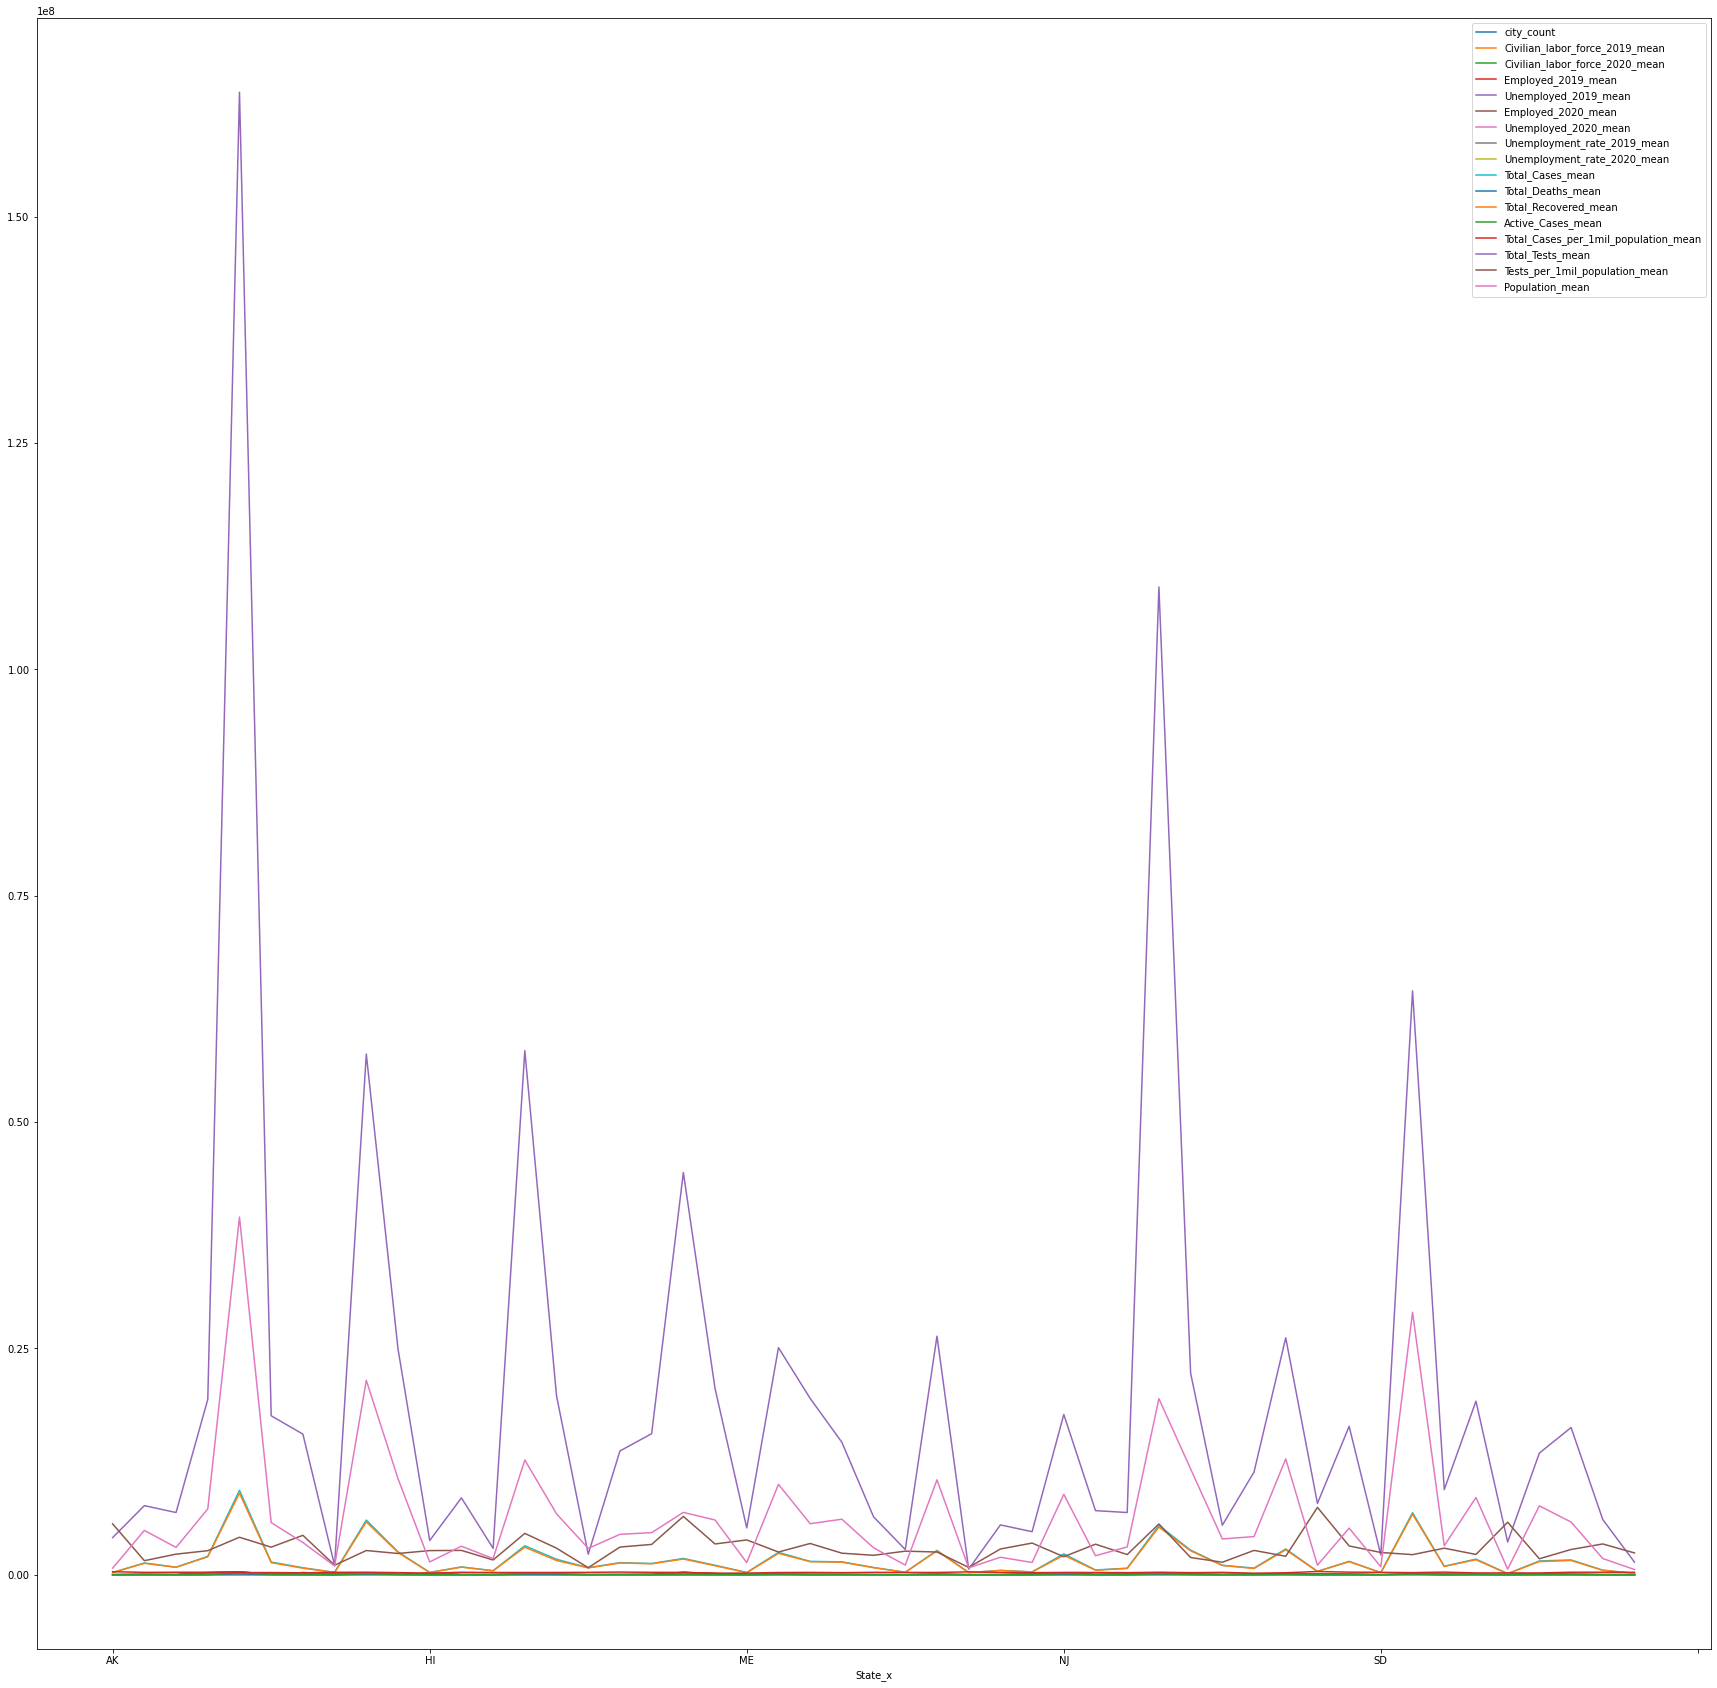

Double Click on Graph to view it properly.


In [32]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [30, 30]

# plt.figure(figsize=(50,50))
byState.plot(kind='line')
plt.show()
print("Double Click on Graph to view it properly.")

In [33]:
byState_unemployment = final_data.groupby('State_x').agg(
    Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
    Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
    )
byState_unemployment.head()

,Unemployed_2019_mean,Unemployed_2020_mean
State_x,,
AK,659.793103,937.793103
AL,1013.253731,1956.194030
AR,641.453333,1092.693333
AZ,11470.866667,18804.600000
CA,13848.586207,32898.155172


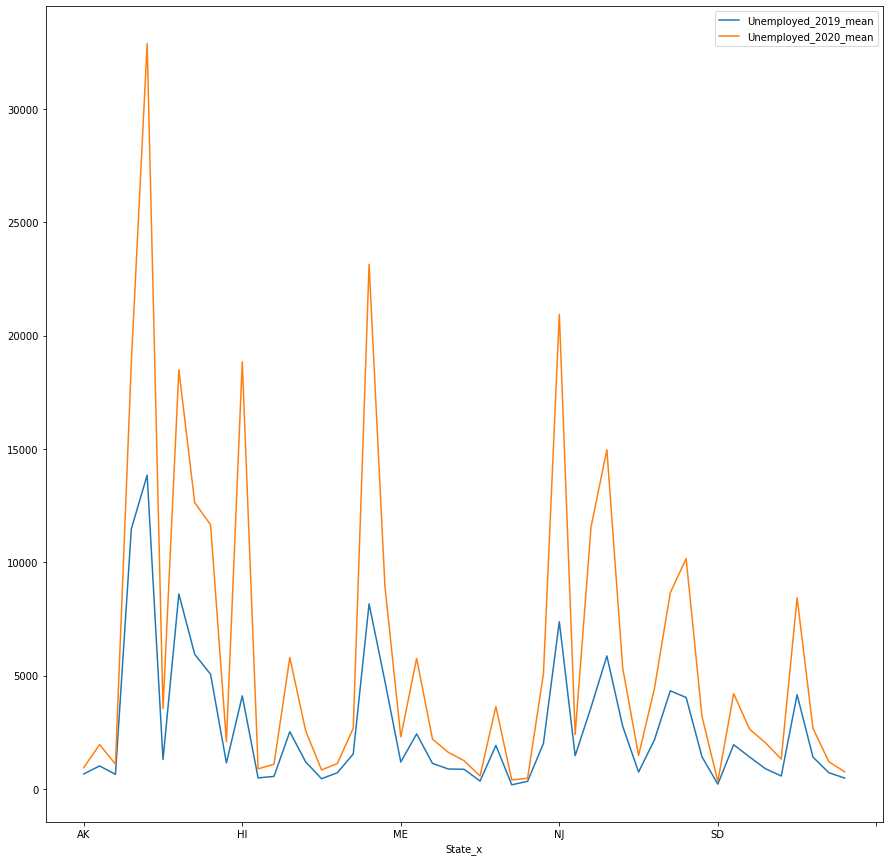

Double Click on Graph to view it properly.


In [34]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15, 15]

# plt.figure(figsize=(50,50))
byState_unemployment.plot(kind='line')
plt.show()
print("Double Click on Graph to view it properly.")

In [35]:
byState_employment = final_data.groupby('State_x').agg(
    Employed_2019_mean = ('Employed_2019', 'mean'),
    Employed_2020_mean = ('Employed_2020', 'mean'),
    )
byState_employment.head()

,Employed_2019_mean,Employed_2020_mean
State_x,,
AK,11543.275862,11042.034483
AL,32379.089552,31329.358209
AR,17562.173333,16964.626667
AZ,224444.133333,219210.000000
CA,319836.620690,291604.879310


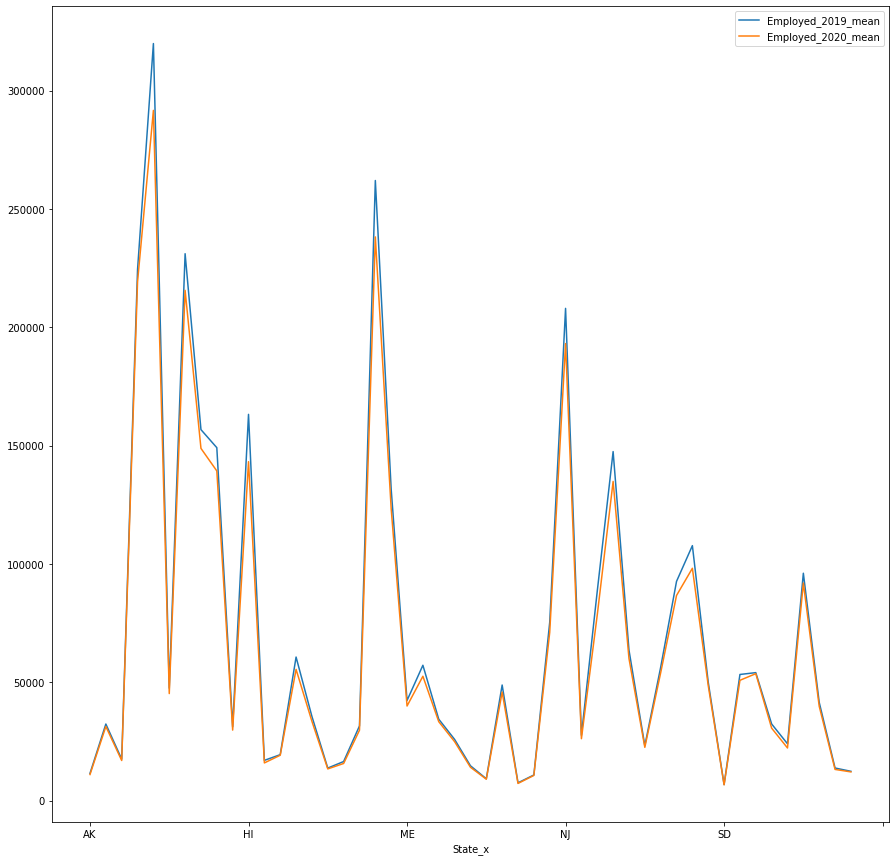

Double Click on Graph to view it properly.


In [36]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15, 15]

# plt.figure(figsize=(50,50))
byState_employment.plot(kind='line')
plt.show()
print("Double Click on Graph to view it properly.")

In [72]:
byState_2019 = final_data.groupby('State_x').agg(
    Employed_2019_mean = ('Employed_2019', 'mean'),
    Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
    )
byState_2019.head()

,Employed_2019_mean,Unemployed_2019_mean
State_x,,
AK,11543.275862,659.793103
AL,32379.089552,1013.253731
AR,17562.173333,641.453333
AZ,224444.133333,11470.866667
CA,319836.620690,13848.586207


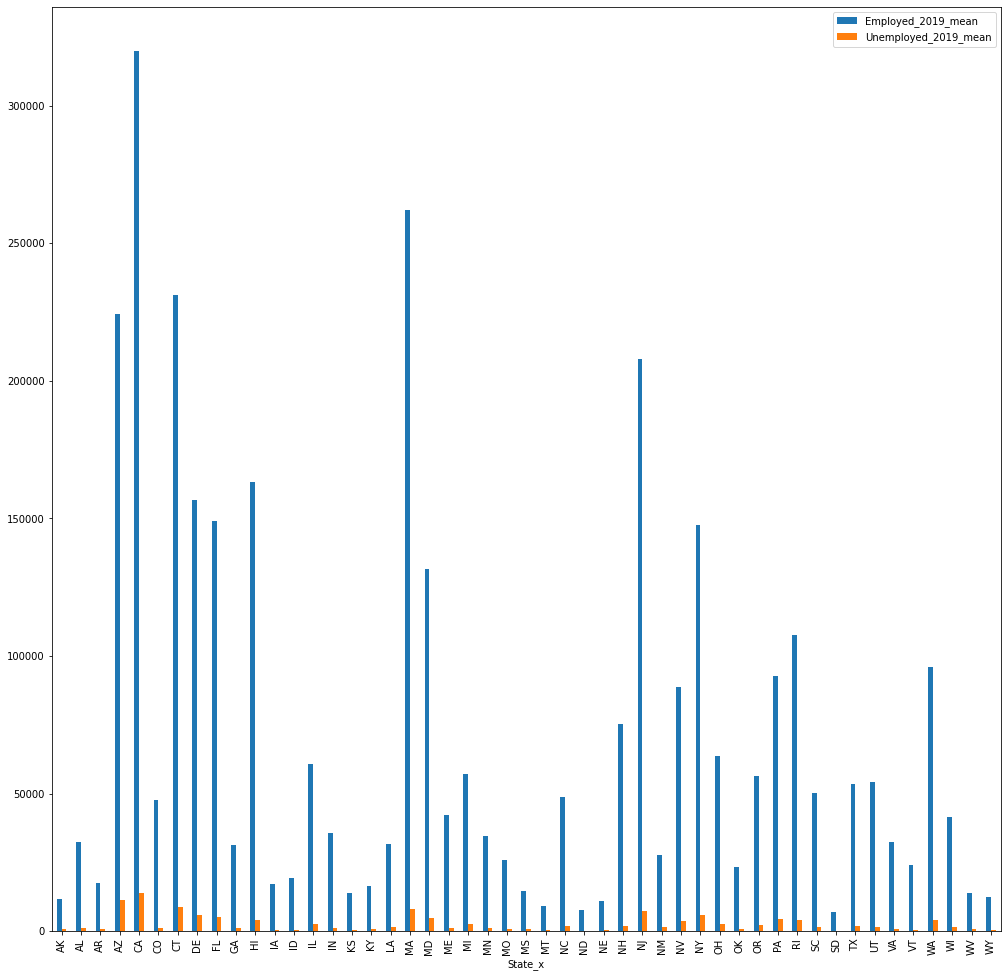

In [38]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [17, 17]

#plt.figure(figsize=(25,12))
byState_2019.plot(kind='bar', stacked=False)

In [39]:
byState_2020 = final_data.groupby('State_x').agg(
    Employed_2020_mean = ('Employed_2020', 'mean'),
    Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
    )
byState_2020.head()

,Employed_2020_mean,Unemployed_2020_mean
State_x,,
AK,11042.034483,937.793103
AL,31329.358209,1956.194030
AR,16964.626667,1092.693333
AZ,219210.000000,18804.600000
CA,291604.879310,32898.155172


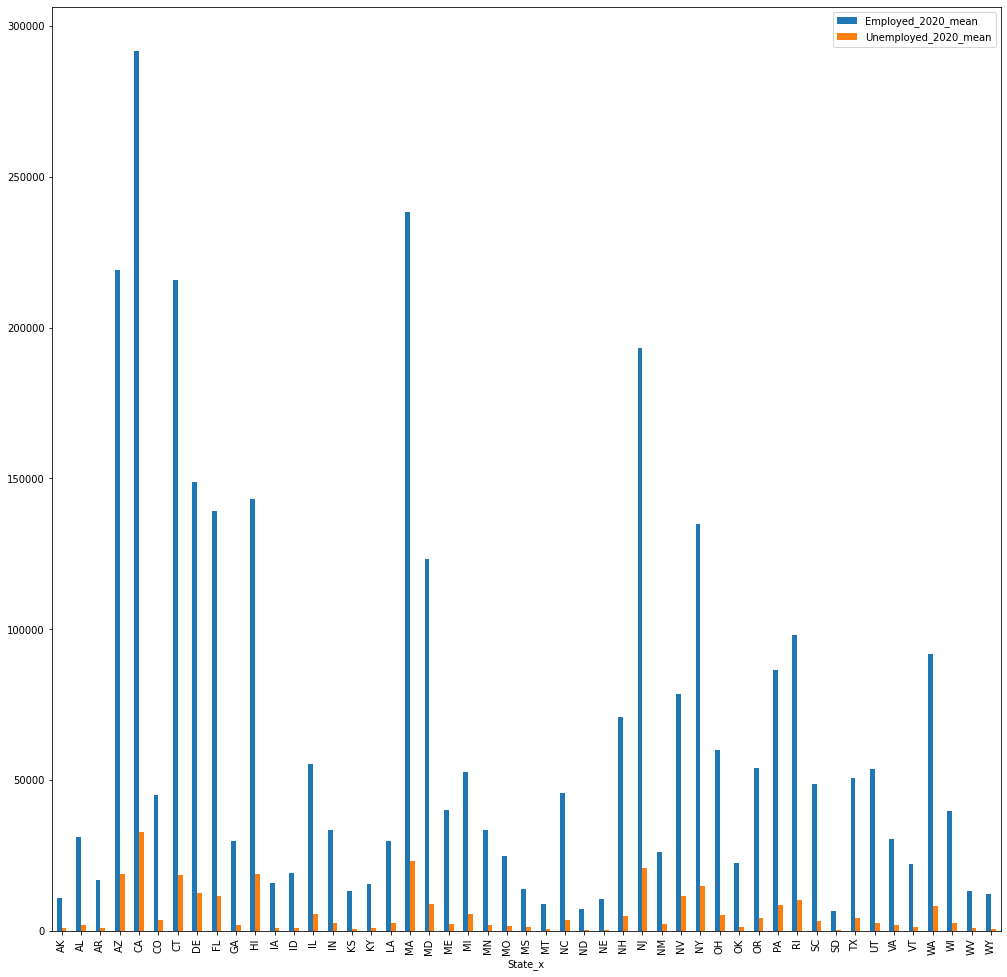

In [40]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [17, 17]

#plt.figure(figsize=(25,12))
byState_2020.plot(kind='bar', stacked=False)

In [73]:
byState_both = final_data.groupby('State_x').agg(
    Employed_2019_mean = ('Employed_2019', 'mean'),
    Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
    Employed_2020_mean = ('Employed_2020', 'mean'),
    Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
    )
byState_both.head()

,Employed_2019_mean,Unemployed_2019_mean,Employed_2020_mean,Unemployed_2020_mean
State_x,,,,
AK,11543.275862,659.793103,11042.034483,937.793103
AL,32379.089552,1013.253731,31329.358209,1956.194030
AR,17562.173333,641.453333,16964.626667,1092.693333
AZ,224444.133333,11470.866667,219210.000000,18804.600000
CA,319836.620690,13848.586207,291604.879310,32898.155172


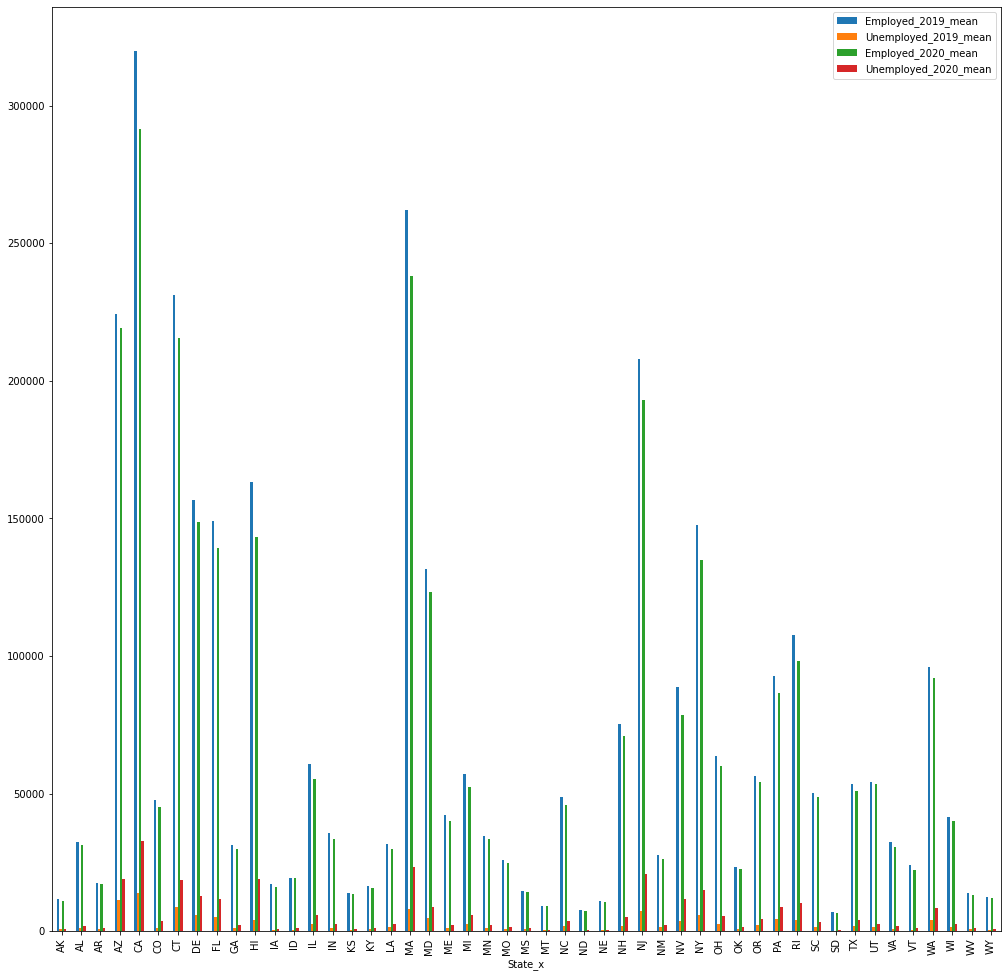

In [42]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [17, 17]

#plt.figure(figsize=(25,12))
byState_both.plot(kind='bar', stacked=False)

In [43]:
byState_unemployment_rate = final_data.groupby('State_x').agg(
     Unemployment_rate_2019_mean = ('Unemployment_rate_2019', 'mean'),
     Unemployment_rate_2020_mean = ('Unemployment_rate_2020', 'mean'),
    )
byState_unemployment_rate.head()

,Unemployment_rate_2019_mean,Unemployment_rate_2020_mean
State_x,,
AK,7.386207,9.748276
AL,3.477612,6.283582
AR,4.152000,6.293333
AZ,6.640000,8.986667
CA,5.246552,9.717241


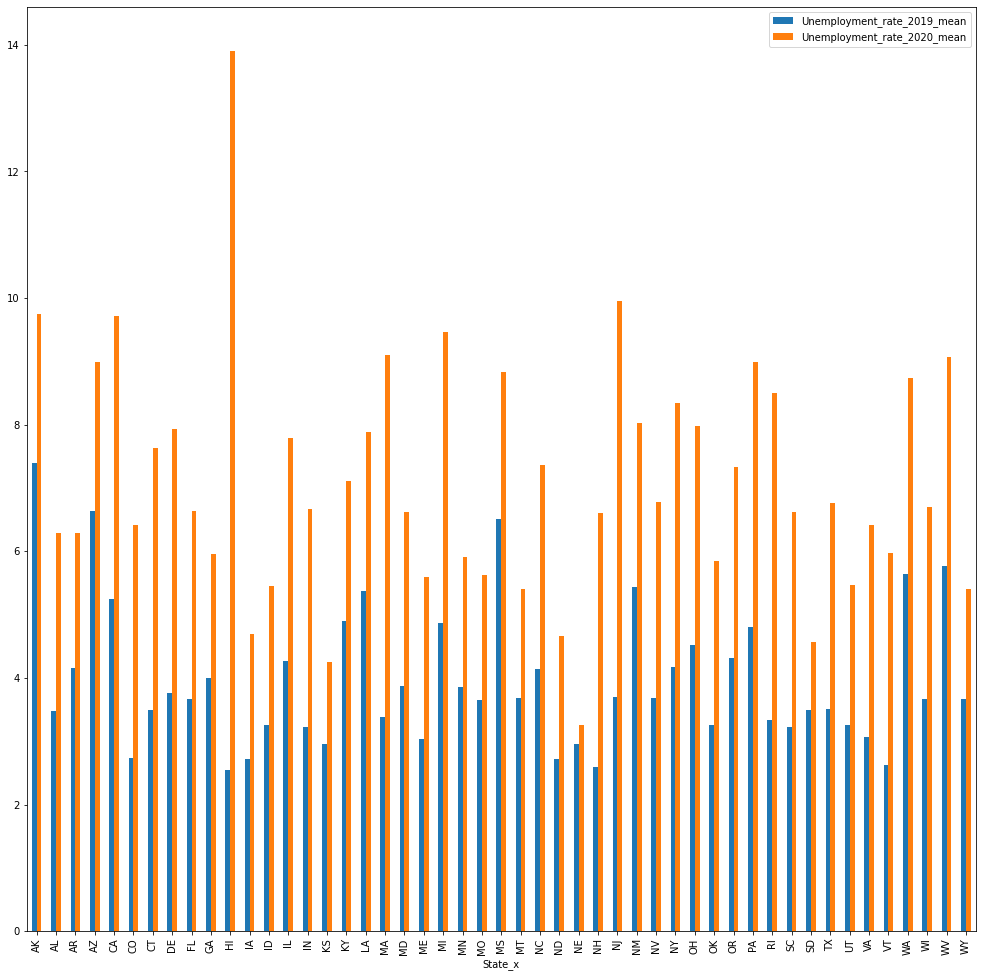

In [44]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [17, 17]

#plt.figure(figsize=(25,12))
byState_unemployment_rate.plot(kind='bar', stacked=False)

In [45]:
byState_cases_with_unemployment = final_data.groupby('State_x').agg(
     Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
     Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
     Total_Cases_mean = ('Total Cases', 'mean'),
    )
byState_cases_with_unemployment.head()

,Unemployed_2019_mean,Unemployed_2020_mean,Total_Cases_mean
State_x,,,
AK,659.793103,937.793103,247865.0
AL,1013.253731,1956.194030,1304291.0
AR,641.453333,1092.693333,837977.0
AZ,11470.866667,18804.600000,2030925.0
CA,13848.586207,32898.155172,9326844.0


In [46]:
print(byState_cases_with_unemployment['Total_Cases_mean'].mean())
print(byState_cases_with_unemployment['Unemployed_2019_mean'].mean())
print(byState_cases_with_unemployment['Unemployed_2020_mean'].mean())

1629135.2040816327
2673.0386184468443
6123.015849354229


In [47]:
byState_cases_with_unemployment['Total_Cases_mean'] = byState_cases_with_unemployment['Total_Cases_mean']/1000000
byState_cases_with_unemployment['Unemployed_2019_mean'] = byState_cases_with_unemployment['Unemployed_2019_mean']/1000
byState_cases_with_unemployment['Unemployed_2020_mean'] = byState_cases_with_unemployment['Unemployed_2020_mean']/1000

In [48]:
byState_cases_with_unemployment.head()

,Unemployed_2019_mean,Unemployed_2020_mean,Total_Cases_mean
State_x,,,
AK,0.659793,0.937793,0.247865
AL,1.013254,1.956194,1.304291
AR,0.641453,1.092693,0.837977
AZ,11.470867,18.804600,2.030925
CA,13.848586,32.898155,9.326844


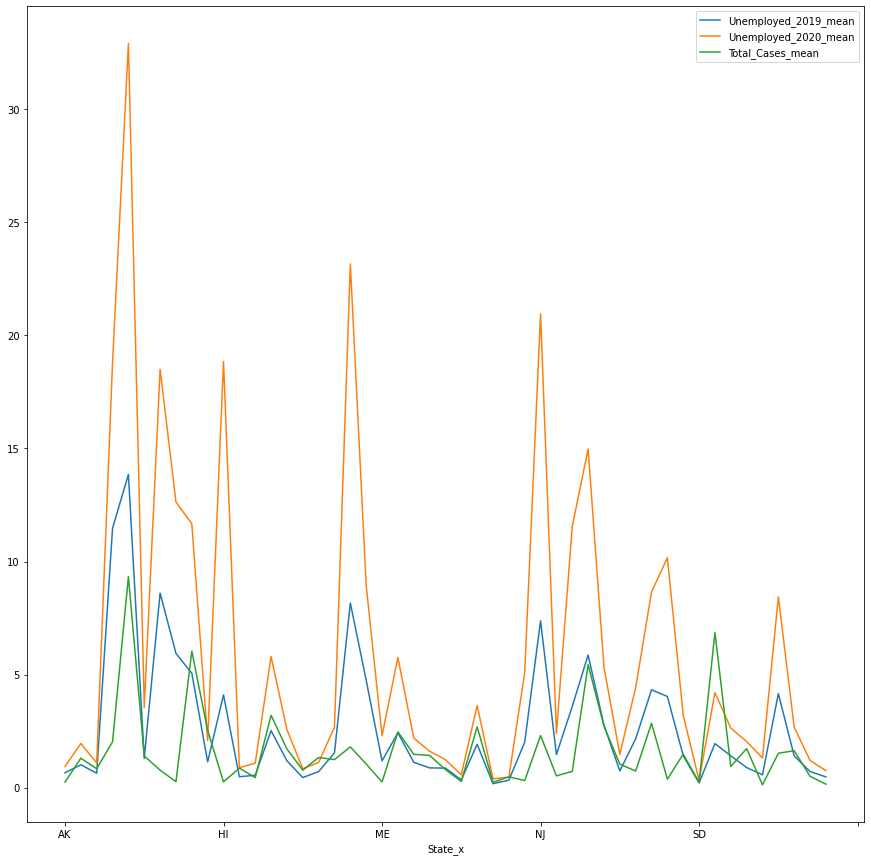

In [49]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15, 15]

# plt.figure(figsize=(50,50))
byState_cases_with_unemployment.plot(kind='line')
plt.show()

#### Hypothesis testing
Does Covid-19 have any impact or relation with the unemployment in the USA?

After observing the visual plots, we can clearly say that the unemployment has spiked after Covid-19 struck USA, and we will have some statistical proof for that

In [54]:
byState_both.head()

,Employed_2019_mean,Unemployed_2019_mean,Employed_2020_mean,Unemployed_2020_mean
State_x,,,,
AK,11543.275862,659.793103,11042.034483,937.793103
AL,32379.089552,1013.253731,31329.358209,1956.194030
AR,17562.173333,641.453333,16964.626667,1092.693333
AZ,224444.133333,11470.866667,219210.000000,18804.600000
CA,319836.620690,13848.586207,291604.879310,32898.155172


In [59]:
'increase_in_unemployed'
byState_increase_unemployed = final_data.groupby('State_x').agg(
     Unemployed_2019_mean = ('Unemployed_2019', 'mean'),
     Unemployed_2020_mean = ('Unemployed_2020', 'mean'),
    )
byState_increase_unemployed.head()

,Unemployed_2019_mean,Unemployed_2020_mean
State_x,,
AK,659.793103,937.793103
AL,1013.253731,1956.194030
AR,641.453333,1092.693333
AZ,11470.866667,18804.600000
CA,13848.586207,32898.155172


In [60]:
byState_increase_unemployed['unemployment_diff'] = byState_increase_unemployed['Unemployed_2020_mean'] - byState_increase_unemployed['Unemployed_2019_mean']

In [61]:
byState_increase_unemployed.head()

,Unemployed_2019_mean,Unemployed_2020_mean,unemployment_diff
State_x,,,
AK,659.793103,937.793103,278.000000
AL,1013.253731,1956.194030,942.940299
AR,641.453333,1092.693333,451.240000
AZ,11470.866667,18804.600000,7333.733333
CA,13848.586207,32898.155172,19049.568966


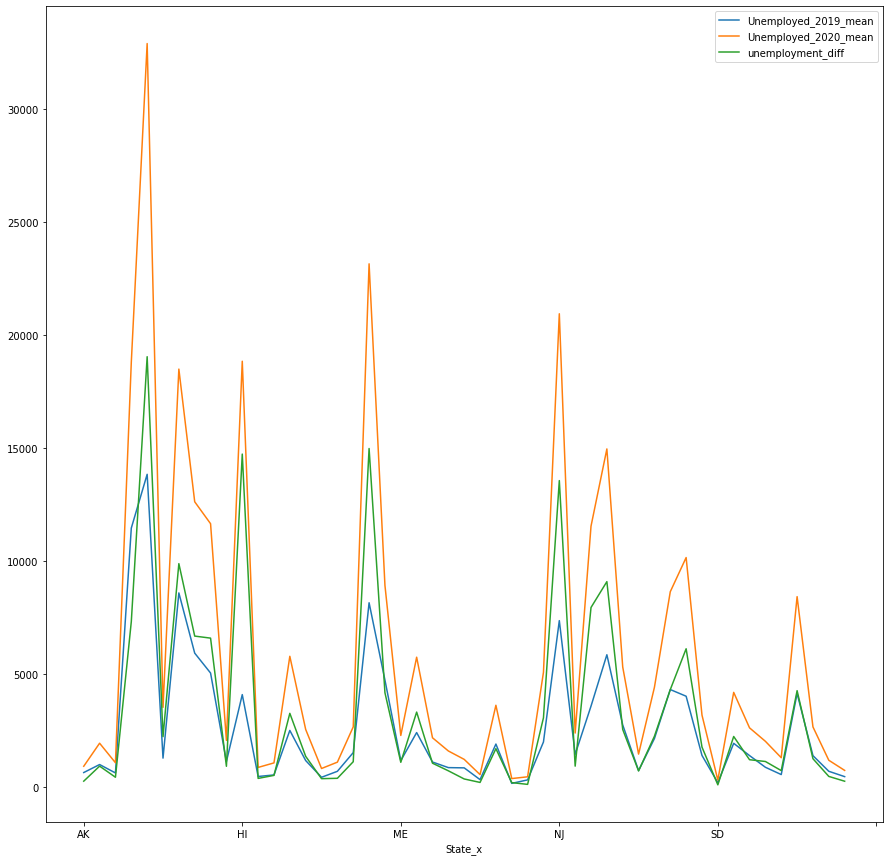

In [67]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15, 15]

# plt.figure(figsize=(50,50))
byState_increase_unemployed.plot(kind='line')
plt.show()

This plot shows the difference between the unemployment stats of 2019 and 2020

### Thank You